<a href="https://colab.research.google.com/github/HasanMuslim/ML.Project/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Kütüphaneleri İçe Aktarma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn; "sklearn.model_selection"
import sklearn; "sklearn.metrics"
import sklearn; "sklearn.ensemble"
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer

# Veri Setini Yükleme

dataset = pd.read_csv("/content/Melbourne_housing_FULL.csv.zip")

dataset_copy = dataset.copy()

dataset_copy.head()

dataset_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [17]:
# Verilerin İstatistiksel İncelenmesi

print(f'Shape     : {dataset_copy.shape}\n'
      f'Size      : {dataset_copy.size}\n'
      f'Dimension : {dataset_copy.ndim}')


dataset_copy.nunique()

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [18]:
# Yinelenen Verileri Temizleme

duplicates = dataset_copy[dataset_copy.duplicated()]
print(duplicates)

dataset_copy = dataset_copy.drop_duplicates()
print(dataset_copy)

dataset_copy.isnull().sum()


           Suburb        Address  Rooms Type  Price Method SellerG  \
15858  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
15858  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   

       BuildingArea  YearBuilt              CouncilArea Lattitude  Longtitude  \
15858         226.0     2000.0  Manningham City Council -37.82678   145.16777   

                 Regionname Propertycount  
15858  Eastern Metropolitan        4973.0  

[1 rows x 21 columns]
           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ..

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

           Suburb             Address  Rooms Type      Price Method  SellerG  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   Jellis   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   Biggin   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   Biggin   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   Rounds   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   Biggin   
...           ...                 ...    ...  ...        ...    ...      ...   
34851  Yarraville       78 Bayview Rd      3    h  1101000.0      S      Jas   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI      Jas   
34853  Yarraville       29A Murray St      2    h   888000.0     SP  Sweeney   
34854  Yarraville      147A Severn St      2    t   705000.0      S      Jas   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI       RW   

             Date  Distance  Postcode  

<Axes: xlabel='Landsize'>

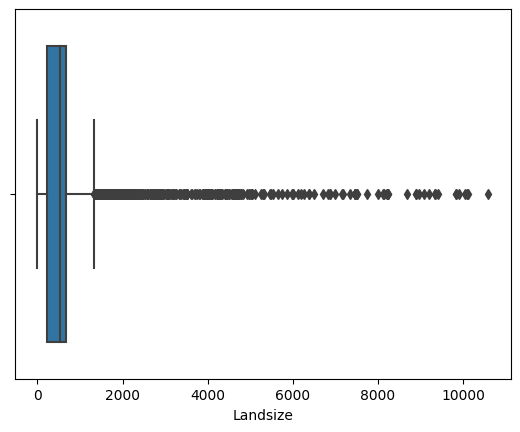

In [19]:
# Z-Skor Yöntemi ile Aykırı Verileri Bulma ve Temizleme

lower_z_limit = -3
upper_z_limit = 3

z_scores = (dataset['Landsize'] - dataset['Landsize'].mean()) / dataset['Landsize'].std()

filtered_data = dataset[(z_scores >= lower_z_limit) & (z_scores <= upper_z_limit)]

print(filtered_data)

sns.boxplot(x=filtered_data['Landsize'])

           Suburb           Address  Rooms Type      Price Method  SellerG  \
2      Abbotsford   25 Bloomburg St      2    h  1035000.0      S   Biggin   
4      Abbotsford      5 Charles St      3    h  1465000.0     SP   Biggin   
6      Abbotsford       55a Park St      4    h  1600000.0     VB   Nelson   
7      Abbotsford      16 Maugie St      4    h        NaN     SN   Nelson   
11     Abbotsford      124 Yarra St      3    h  1876000.0      S   Nelson   
...           ...               ...    ...  ...        ...    ...      ...   
34849     Wollert   35 Kingscote Wy      3    h   570000.0     SP       RW   
34850     Wollert  15 Rockgarden Wy      3    h        NaN     SP       LJ   
34853  Yarraville     29A Murray St      2    h   888000.0     SP  Sweeney   
34854  Yarraville    147A Severn St      2    t   705000.0      S      Jas   
34856  Yarraville  3 Tarrengower St      2    h  1020000.0     PI       RW   

             Date  Distance  Postcode  ...  Bathroom  Car  Land

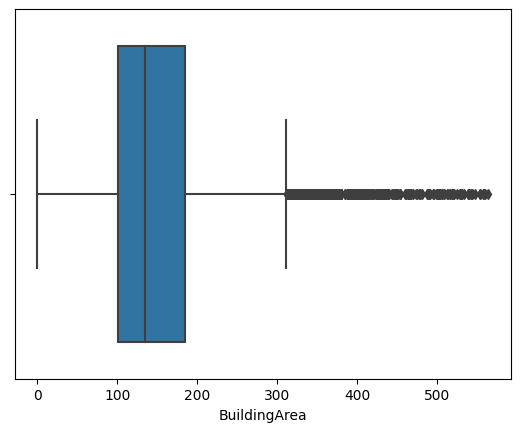

In [20]:
z_scores2 = (filtered_data['BuildingArea'] - filtered_data['BuildingArea'].mean()) / filtered_data['BuildingArea'].std()

filtered_data1 = filtered_data[(z_scores2 >= lower_z_limit) & (z_scores2 <= upper_z_limit)]

print(filtered_data1)

sns.boxplot(x=filtered_data1['BuildingArea'])

dataset_copy = filtered_data1

In [21]:
# Columns Listeleme ve Gerekli İşlemler

cat_cols = []
num_cols = []

for item, item2 in zip(dataset_copy.nunique(), dataset_copy.columns):
    if item >= 20:
        num_cols.append(item2)
    else:
        cat_cols.append(item2)

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

def get_string_columns(dataframe):
    string_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
    return string_columns

string_columns_list = get_string_columns(dataset_copy)

def get_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()
    return numeric_columns

numeric_columns_list = get_numeric_columns(dataset_copy)

print("string columns:", string_columns_list)
print("numeric columns:", numeric_columns_list)

columns_to_convert = dataset_copy.select_dtypes(include=['object']).columns

dataset_copy[columns_to_convert] = dataset_copy[columns_to_convert].astype('category')


columns_to_convert = dataset_copy.select_dtypes(include=['int64']).columns

dataset_copy[columns_to_convert] = dataset_copy[columns_to_convert].astype('float64')

dataset_copy.info()

dataset_copy.isnull().sum()

Categorical Columns: ['Rooms', 'Type', 'Method', 'Bedroom2', 'Bathroom', 'Car', 'Regionname']
Numerical Columns: ['Suburb', 'Address', 'Price', 'SellerG', 'Date', 'Distance', 'Postcode', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount']
string columns: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
numeric columns: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12059 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         12059 non-null  category
 1   Address        12059 non-null  category
 2   Rooms          12059 non-null  float64 
 3   Type           12059 non-null  category
 4   Price          9319 non-null   float64 
 5   Meth

<ipython-input-21-241f5748c42f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy[columns_to_convert] = dataset_copy[columns_to_convert].astype('category')
<ipython-input-21-241f5748c42f>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy[columns_to_convert] = dataset_copy[columns_to_convert].astype('float64')


Suburb              0
Address             0
Rooms               0
Type                0
Price            2740
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               181
Landsize            0
BuildingArea        0
YearBuilt         411
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
dtype: int64

In [22]:
# Eksik Verileri Mod ve Medyan Yöntemi ile Doldurma

for column in cat_cols:
  dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].mode().iloc[0])

dataset_copy.isnull().sum()

for column in numeric_columns_list:
  dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].median())

dataset_copy.isnull().sum()

<ipython-input-22-74381b02409c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].mode().iloc[0])
<ipython-input-22-74381b02409c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy[column] = dataset_copy[column].fillna(dataset_copy[column].mode().iloc[0])
<ipython-input-22-74381b02409c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [23]:
# Veri Sütunu Droplama İşlemi

dataset_copy = dataset_copy.drop(columns=['YearBuilt'])

dataset_copy.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

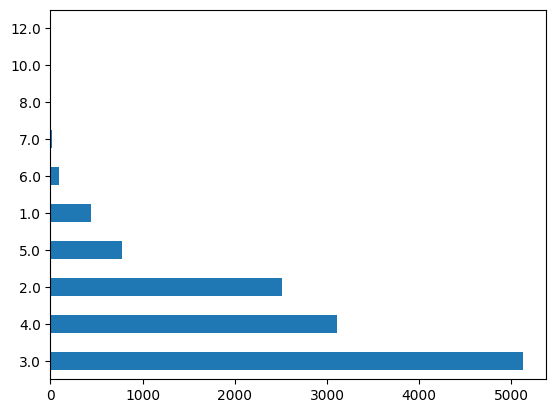

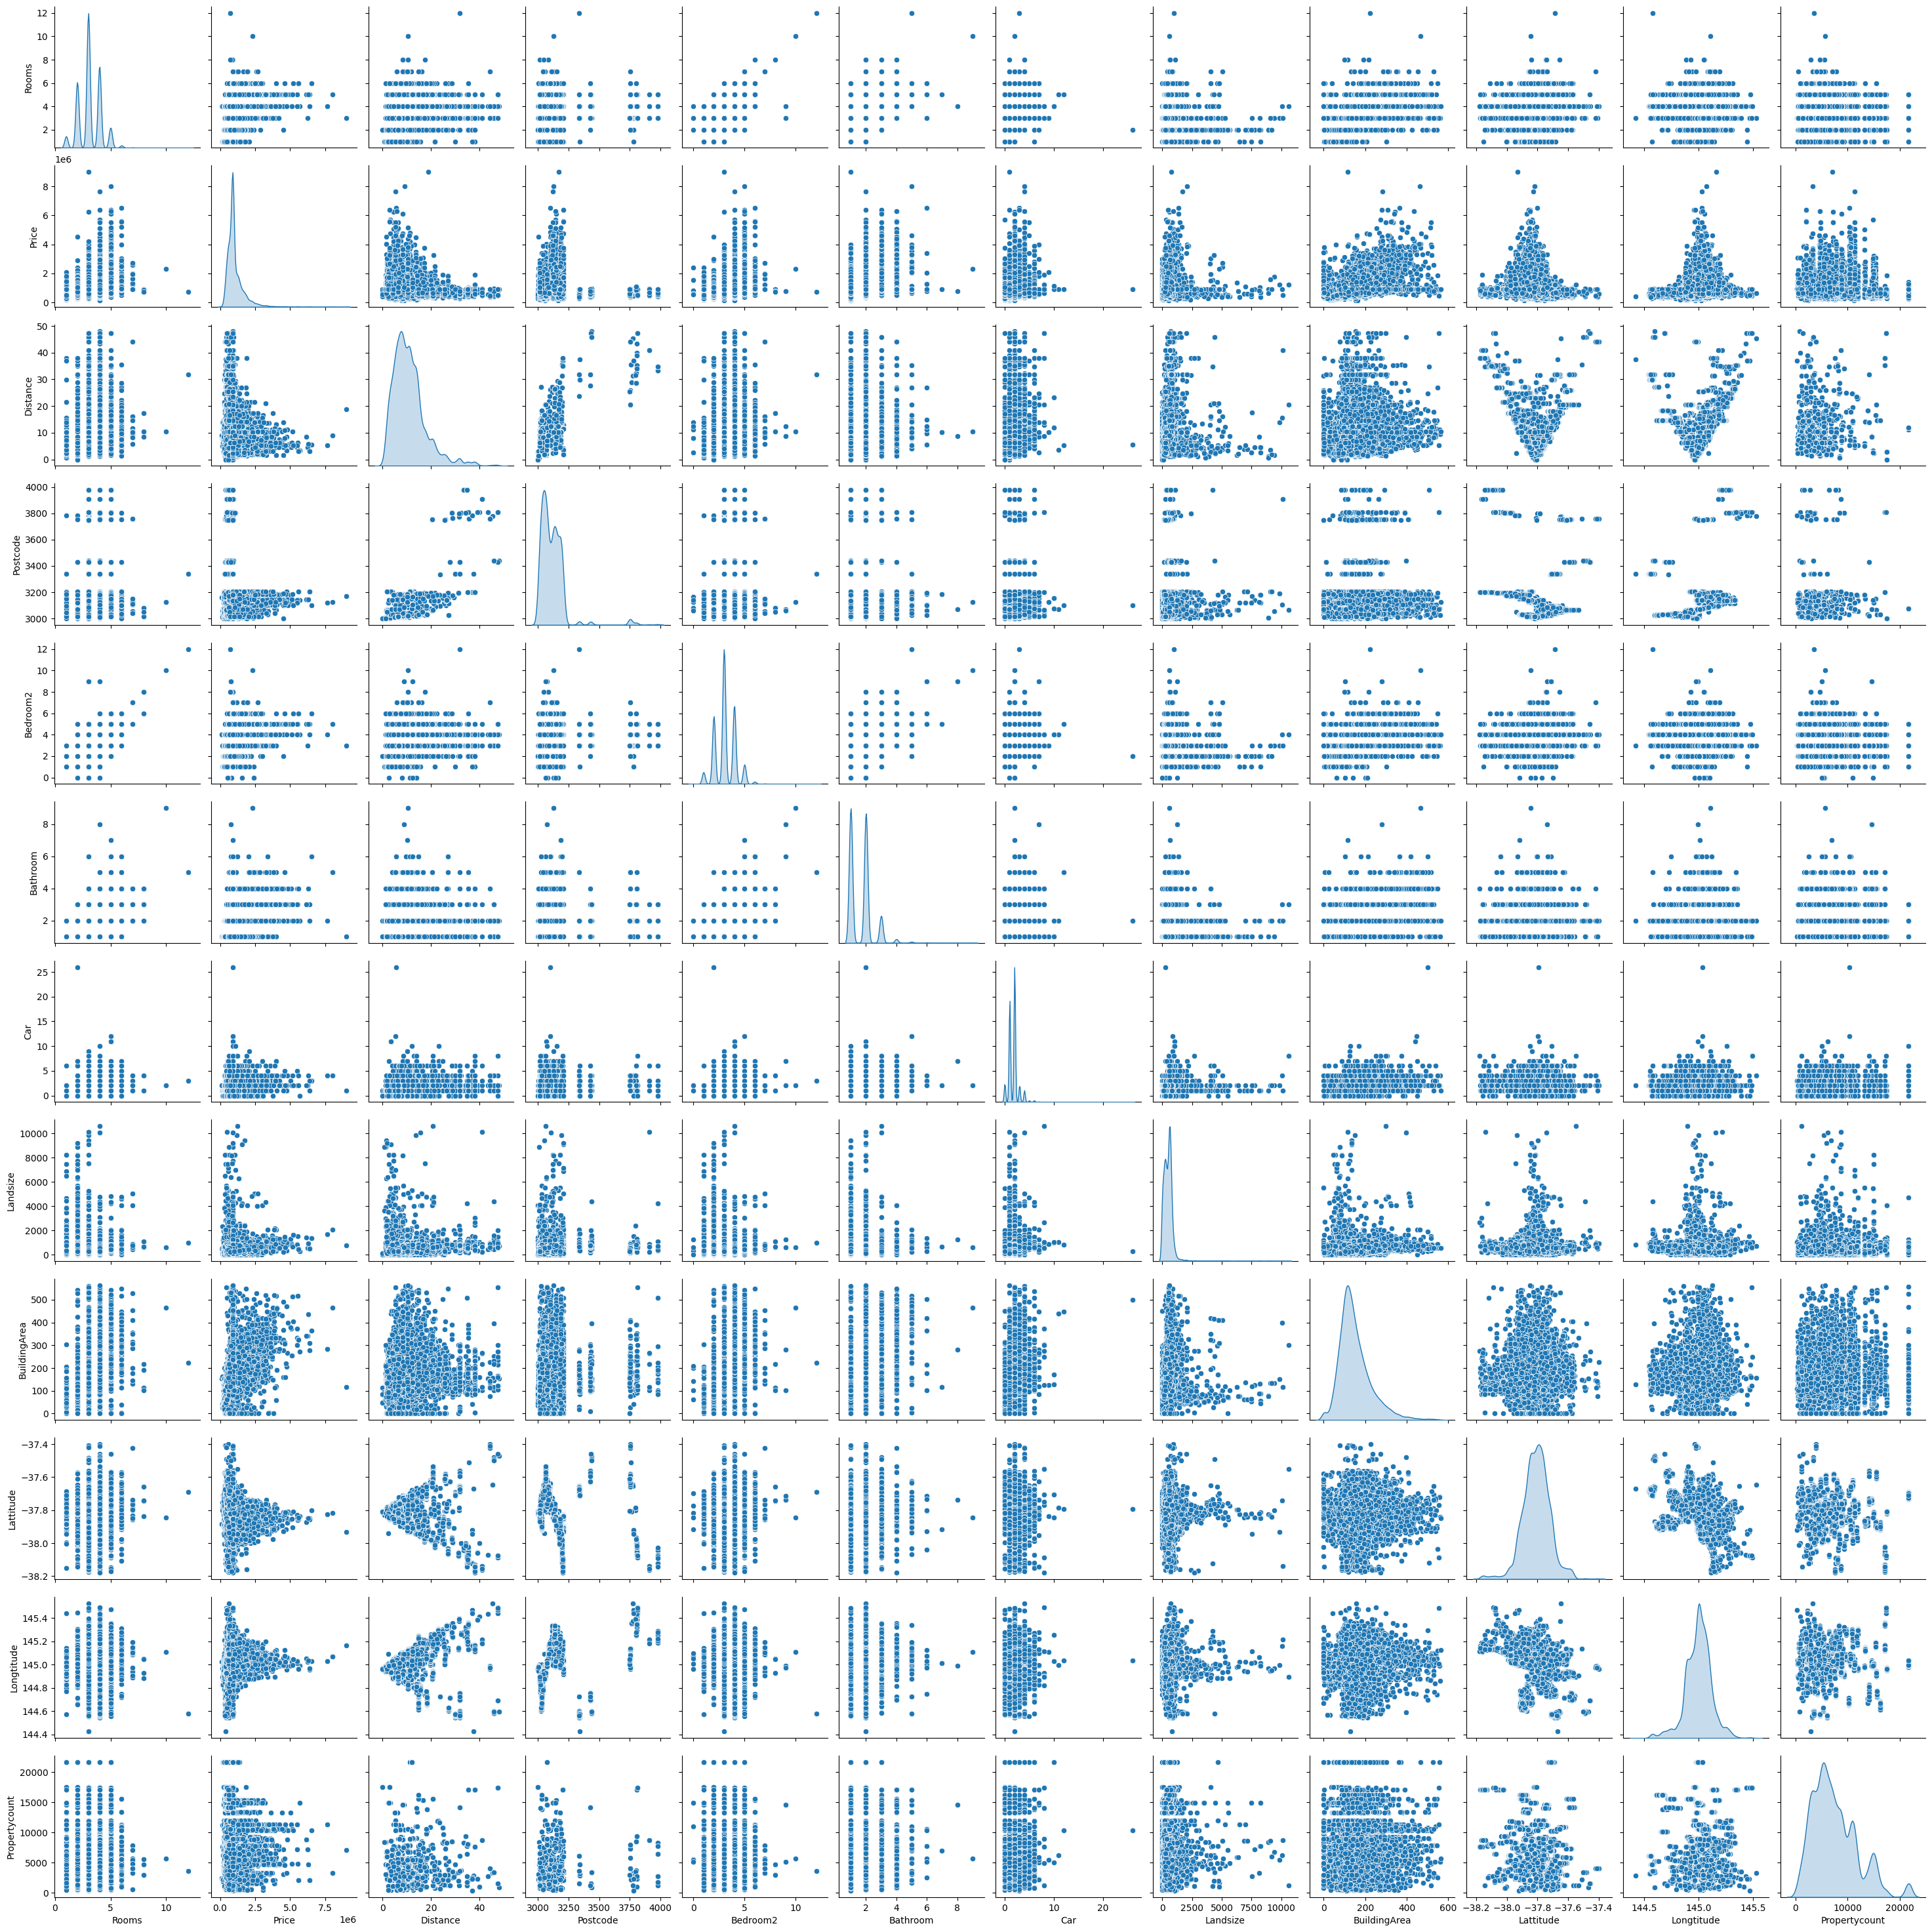

<Axes: xlabel='Price', ylabel='Count'>

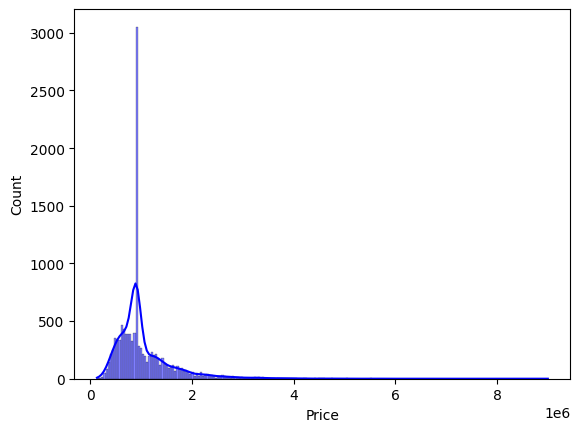

In [24]:
# Veri Görselleştirme

dataset_copy.Rooms.value_counts().plot.barh()

sns.pairplot(dataset_copy, diag_kind="kde")
plt.show()

sns.histplot(data=dataset_copy["Price"], kde=True, color="blue" )

<ipython-input-25-7a4ea0b002bf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasyon_matrisi = dataset_copy.corr()


<Axes: >

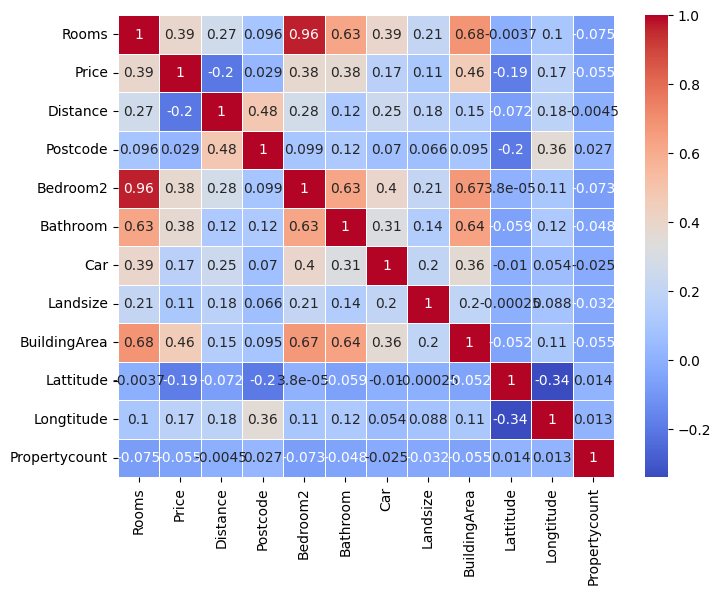

In [25]:
# Korelasyon Matrisi Çizimi

korelasyon_matrisi = dataset_copy.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', linewidths=0.5)

In [26]:
# OneHotEncoder Uygulama

encode_columns = []
encode_columns.append(string_columns_list)
encode_columns.append(cat_cols)

def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

dataset_copy = one_hot_encoder(dataset_copy, string_columns_list, drop_first=True)


In [27]:
# Model Seçimleri

x = dataset_copy.drop(["Price"], axis = 1)
y = dataset_copy["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

models = {
     'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
},
}



(9647, 12569)
(2412, 12569)
(9647,)
(2412,)


In [ ]:
# Model Eğitimi
for model_name, model_params in models.items():

    model = model_params['model']

    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    # Değerlendirme Metrikleri

    # MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, predictions)
    print(f'-----------{model_name}--------------')
    print(f'MAE: {mae}')

    # MSE (Mean Squared Error)
    mse = mean_squared_error(y_test, predictions)
    print(f'MSE: {mse}')

    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse}')

    # R2 Score
    r2 = r2_score(y_test, predictions)
    print(f'R2 Score: {r2}\n------------------------------')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.829e+13, tolerance: 3.446e+11
  model = cd_fast.enet_coordinate_descent(


-----------Lasso--------------
MAE: 288612.41813605983
MSE: 233378660042.32227
RMSE: 483092.8068625347
R2 Score: 0.3740683208114117
------------------------------
